## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import RANSACRegressor, LinearRegression, Ridge, Lasso
from statsmodels.api import OLS, add_constant
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Import Dataset

In [2]:
path = 'C:/Users/julia/Desktop/Yanjun/Python/Data/final_data.csv6'
car = pd.read_csv(path)
car

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
0,-0.844782,0.074449,-1.690772,-0.546059,0.519071,0.537874,1.086670,-1.188177,-0.689072,0.412947
1,-0.844782,0.074449,-1.690772,-0.546059,0.519071,0.537874,1.086670,-1.188177,-0.689072,0.413187
2,-0.190566,0.604046,-0.708596,-0.691627,-2.404880,-1.859172,1.086670,-1.188177,-0.689072,0.413187
3,0.136542,-0.431076,0.173698,-0.109354,-0.517266,0.537874,1.086670,0.841625,-0.689072,0.412989
4,0.230001,0.218885,0.107110,-1.273900,-0.517266,-1.859172,1.086670,-1.188177,-0.689072,0.413249
...,...,...,...,...,...,...,...,...,...,...
200,1.398245,0.339248,1.721873,-0.400490,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.413210
201,1.351515,0.339248,1.721873,-0.837195,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.413341
202,1.398245,1.109571,1.721873,-1.128332,0.926204,-1.859172,1.086670,-1.188177,-0.689072,0.413460
203,1.398245,0.435538,1.721873,-0.546059,-1.183483,-1.859172,-0.920243,-1.188177,-0.689072,0.413502


## Split X and y

In [3]:
cond = car.columns == 'price'
features = car.columns[~cond]
X = car[features]
y = car['price']

## Split train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## RANSAC

In [5]:
# X = add_constant(X)

In [6]:
# result = OLS(y,X).fit()
# result.summary()

## Ridge (L2)

In [7]:
# fit the model
ridge = Ridge(alpha = 1)
ridge.fit(X = X_train, y = y_train)
cofficient = ridge.coef_
features = ridge.feature_names_in_
cofficient

array([ 1.76747741e-04,  9.48751035e-05,  1.06468045e-05, -1.13392297e-04,
        6.06594895e-05, -8.95736193e-05,  4.29699581e-05, -6.16609470e-05,
       -1.58895675e-04])

In [8]:
intercept = ridge.intercept_
intercept

0.4126308886986871

In [9]:
ridge.score(X = X_train, y = y_train)

0.8547129210393639

In [10]:
# print the regression equation 
equation_list = [features[i] + ' * (' + '{:0.5f}'.format(cofficient[i]) + ' )' + '\n' for i in range(len(cofficient))]
equation =  ' + '.join(equation_list)
equation = equation +' + ' + '{:.5f}'.format(intercept)
print(equation)

carwidth * (0.00018 )
 + enginesize * (0.00009 )
 + wheelbase * (0.00001 )
 + highwaympg * (-0.00011 )
 + boreratio * (0.00006 )
 + cylindernumber_four * (-0.00009 )
 + fuelsystem_mpfi * (0.00004 )
 + drivewheel_fwd * (-0.00006 )
 + fuelsystem_2bbl * (-0.00016 )
 + 0.41263


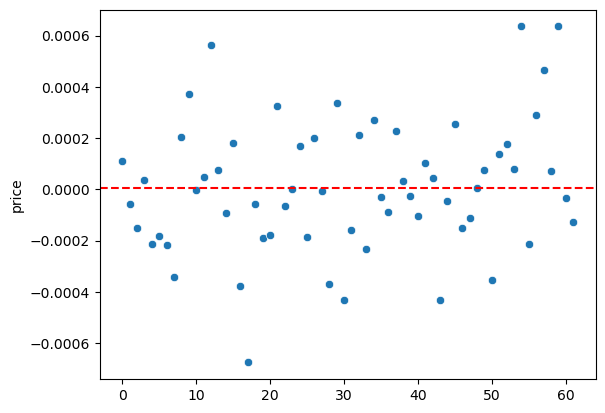

In [11]:
# check the predict
y_predict = ridge.predict(X = X_test)

# check the error 
error_ridge = y_test -  y_predict

# plot the error vs data
sns.scatterplot(x = range(len(X_test)), y = error_ridge, )
plt.axhline(y = error_ridge.mean(), linestyle = '--', color = 'red')
plt.show()
 

In [12]:
# check the r_2 
r2 = r2_score(y_test, y_predict)
r2

0.8456246430228587

## LASSO(L1)

In [13]:
lasso = Lasso(alpha = 0.0003 )
lasso.fit(X = X_train, y = y_train)

Lasso(alpha=0.0003)

In [14]:
cofficient = lasso.coef_
features = lasso.feature_names_in_
cofficient

array([ 9.42223709e-05,  8.30929408e-05,  0.00000000e+00, -1.15648387e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

In [15]:
intercept = lasso.intercept_

In [16]:
equation_list = [features[i] + ' * (' + '{:0.5f}'.format(cofficient[i]) + ' )' + '\n' for i in range(len(cofficient))]
equation =  ' + '.join(equation_list)
equation = equation +' + ' + '{:.5f}'.format(intercept)
print(equation)

carwidth * (0.00009 )
 + enginesize * (0.00008 )
 + wheelbase * (0.00000 )
 + highwaympg * (-0.00012 )
 + boreratio * (0.00000 )
 + cylindernumber_four * (-0.00000 )
 + fuelsystem_mpfi * (0.00000 )
 + drivewheel_fwd * (-0.00000 )
 + fuelsystem_2bbl * (-0.00000 )
 + 0.41264


In [17]:
lasso.score(X = X_train, y = y_train)

0.5388773475172546

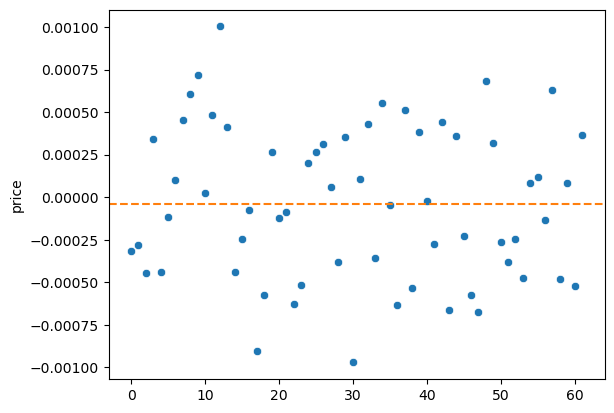

0.5339330695338087

In [18]:
# prdict the result 
y_predict = lasso.predict(X = X_test)

# calculate teh error 
lasso_error = y_test - y_predict

# plot of error vs data
sns.scatterplot(x = range(len(X_test)), y = lasso_error)
plt.axhline(y = lasso_error.mean(), linestyle = '--', color = 'C1' )
plt.show()
r2 = r2_score(y_test, y_predict)
r2

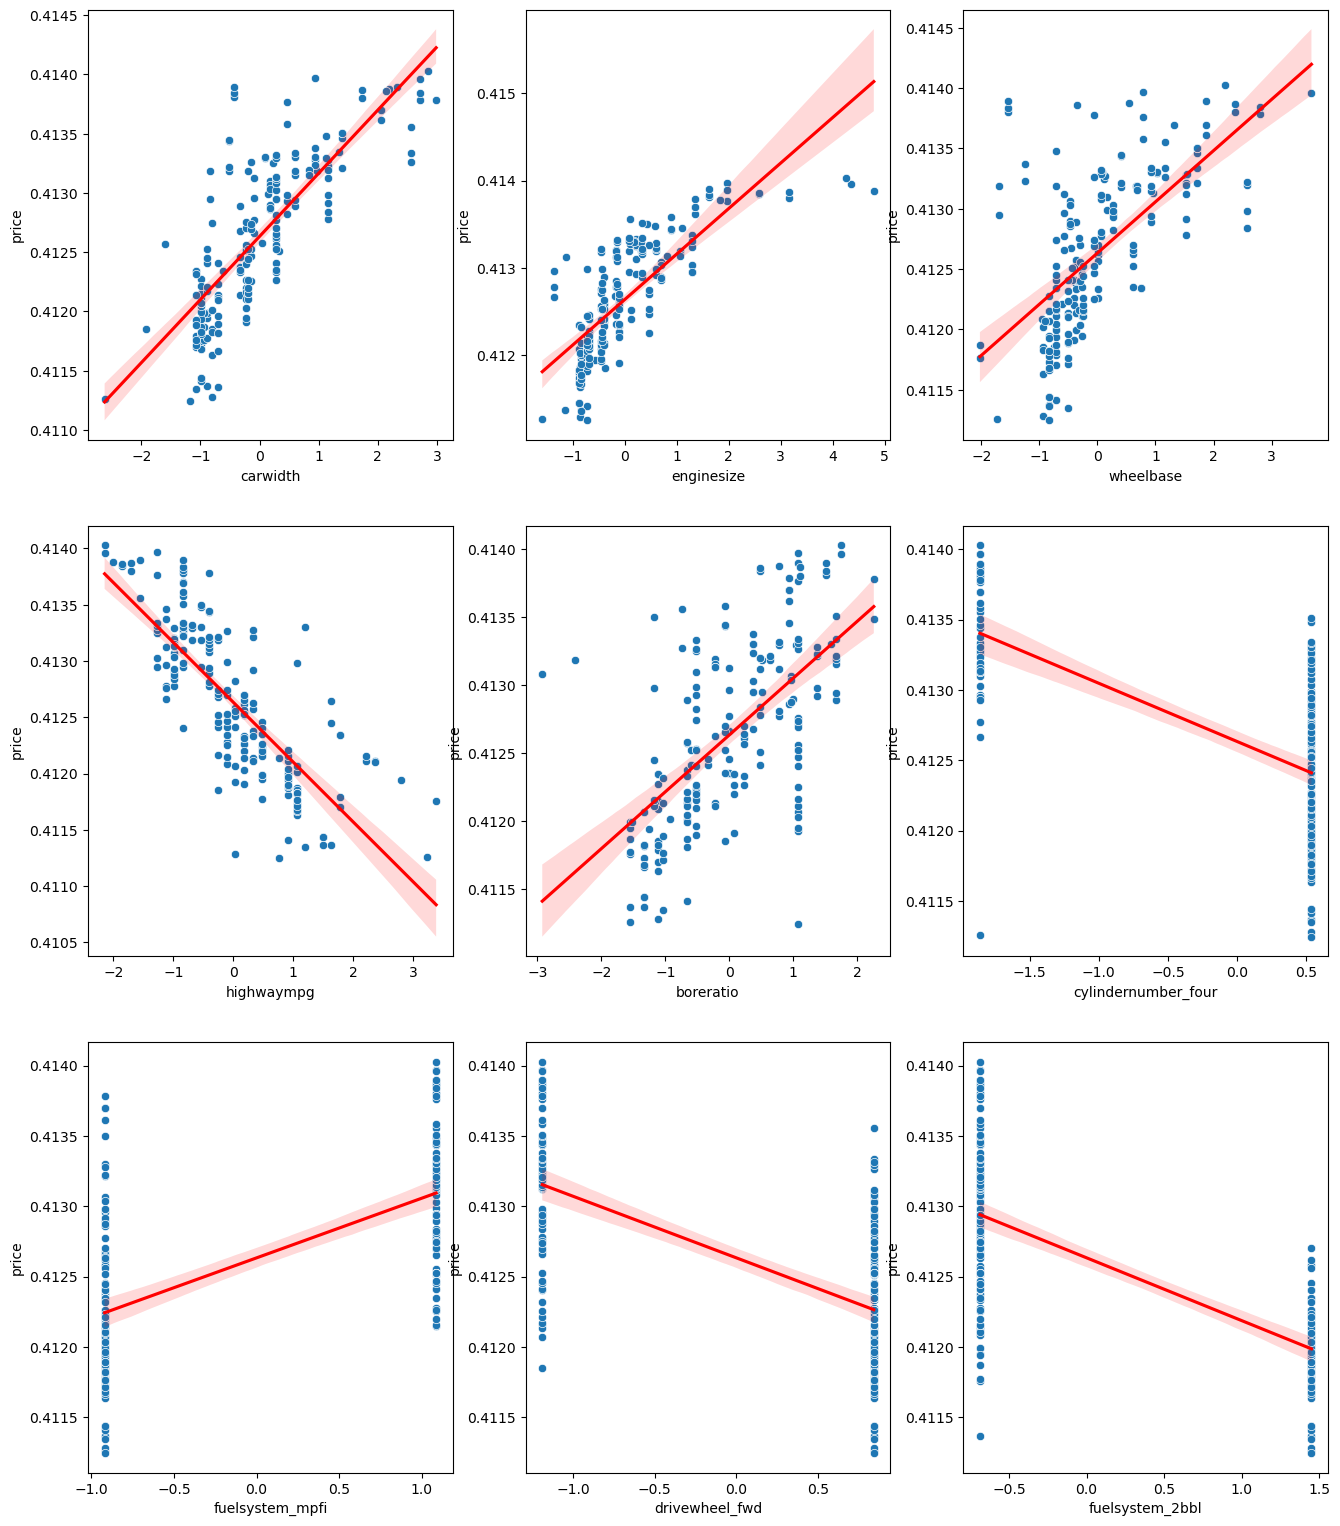

In [19]:
# show the lasso regression plot
fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (16,19))
axes = np.ravel(axes)
for j,i in enumerate(car.columns[0:-1]):
  sns.scatterplot(data = car, x = i, y = 'price' ,ax = axes[j] )
  sns.regplot(data = car, x= i, y = 'price', marker = '',color = 'red', ax = axes[j])
plt.show()

## Polynomial regression

In [20]:
# first transform X to square and then use liner regression

poly = PolynomialFeatures(2)    ## transfrom all X to square or the product of two features

X_train_2degree = poly.fit_transform(X= X_train)

lr = LinearRegression()
# fit the model
lr.fit(X = X_train_2degree, y = y_train)

LinearRegression()

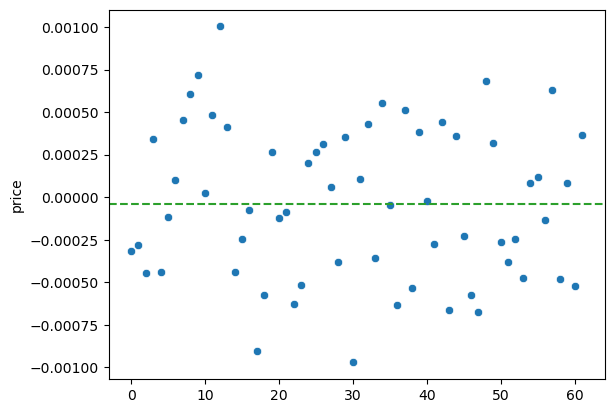

In [21]:
# prdict the result
X_test_2degree = poly.transform(X = X_test)
y_prdict = lr.predict(X = X_test_2degree)

polynomial_error = y_test - y_predict

# plot the error 
sns.scatterplot(x = range(len(X_test)), y = polynomial_error)
plt.axhline(y = polynomial_error.mean(),linestyle = '--', color = 'C2')
plt.show()

In [22]:
X_test_2degree = X_test_2degree.round(5)
X_test_2degree

array([[ 1.     , -1.07843, -0.84031, ...,  1.41176, -1.72431,  2.10606],
       [ 1.     , -0.2373 , -0.45515, ...,  1.41176, -1.72431,  2.10606],
       [ 1.     , -0.98497, -0.45515, ...,  1.41176, -1.72431,  2.10606],
       ...,
       [ 1.     , -1.07843, -0.88846, ...,  0.70833,  1.22139,  2.10606],
       [ 1.     , -0.70459, -0.69587, ...,  0.70833,  1.22139,  2.10606],
       [ 1.     ,  0.93095,  1.30215, ...,  1.41176,  0.81874,  0.47482]])

In [23]:
X_test

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl
154,-1.078431,-0.840310,-0.508831,0.181783,-1.035435,0.537874,-0.920243,-1.188177,1.451227
144,-0.237296,-0.455148,-0.292420,-0.837195,1.074252,0.537874,-0.920243,-1.188177,1.451227
140,-0.984972,-0.455148,-0.908360,0.036215,1.074252,0.537874,-0.920243,-1.188177,1.451227
115,1.164596,-0.166277,1.522109,-0.982764,0.482059,0.537874,1.086670,-1.188177,-0.689072
36,-0.938242,-0.840310,-0.375655,0.472920,-1.516591,0.537874,-0.920243,0.841625,-0.689072
...,...,...,...,...,...,...,...,...,...
11,-0.517674,-0.455148,0.406756,-0.254922,0.630108,0.537874,1.086670,-1.188177,-0.689072
153,-1.078431,-0.840310,-0.508831,0.909625,-1.035435,0.537874,-0.920243,0.841625,1.451227
45,-1.078431,-0.888455,-0.708596,1.783034,-1.109459,0.537874,-0.920243,0.841625,1.451227
156,-0.704593,-0.695874,-0.508831,0.909625,-0.517266,0.537874,-0.920243,0.841625,1.451227


## Plot the polynomial plots

In [24]:
# all test data 
car_test = pd.concat((X_test, y_test), axis = 1)

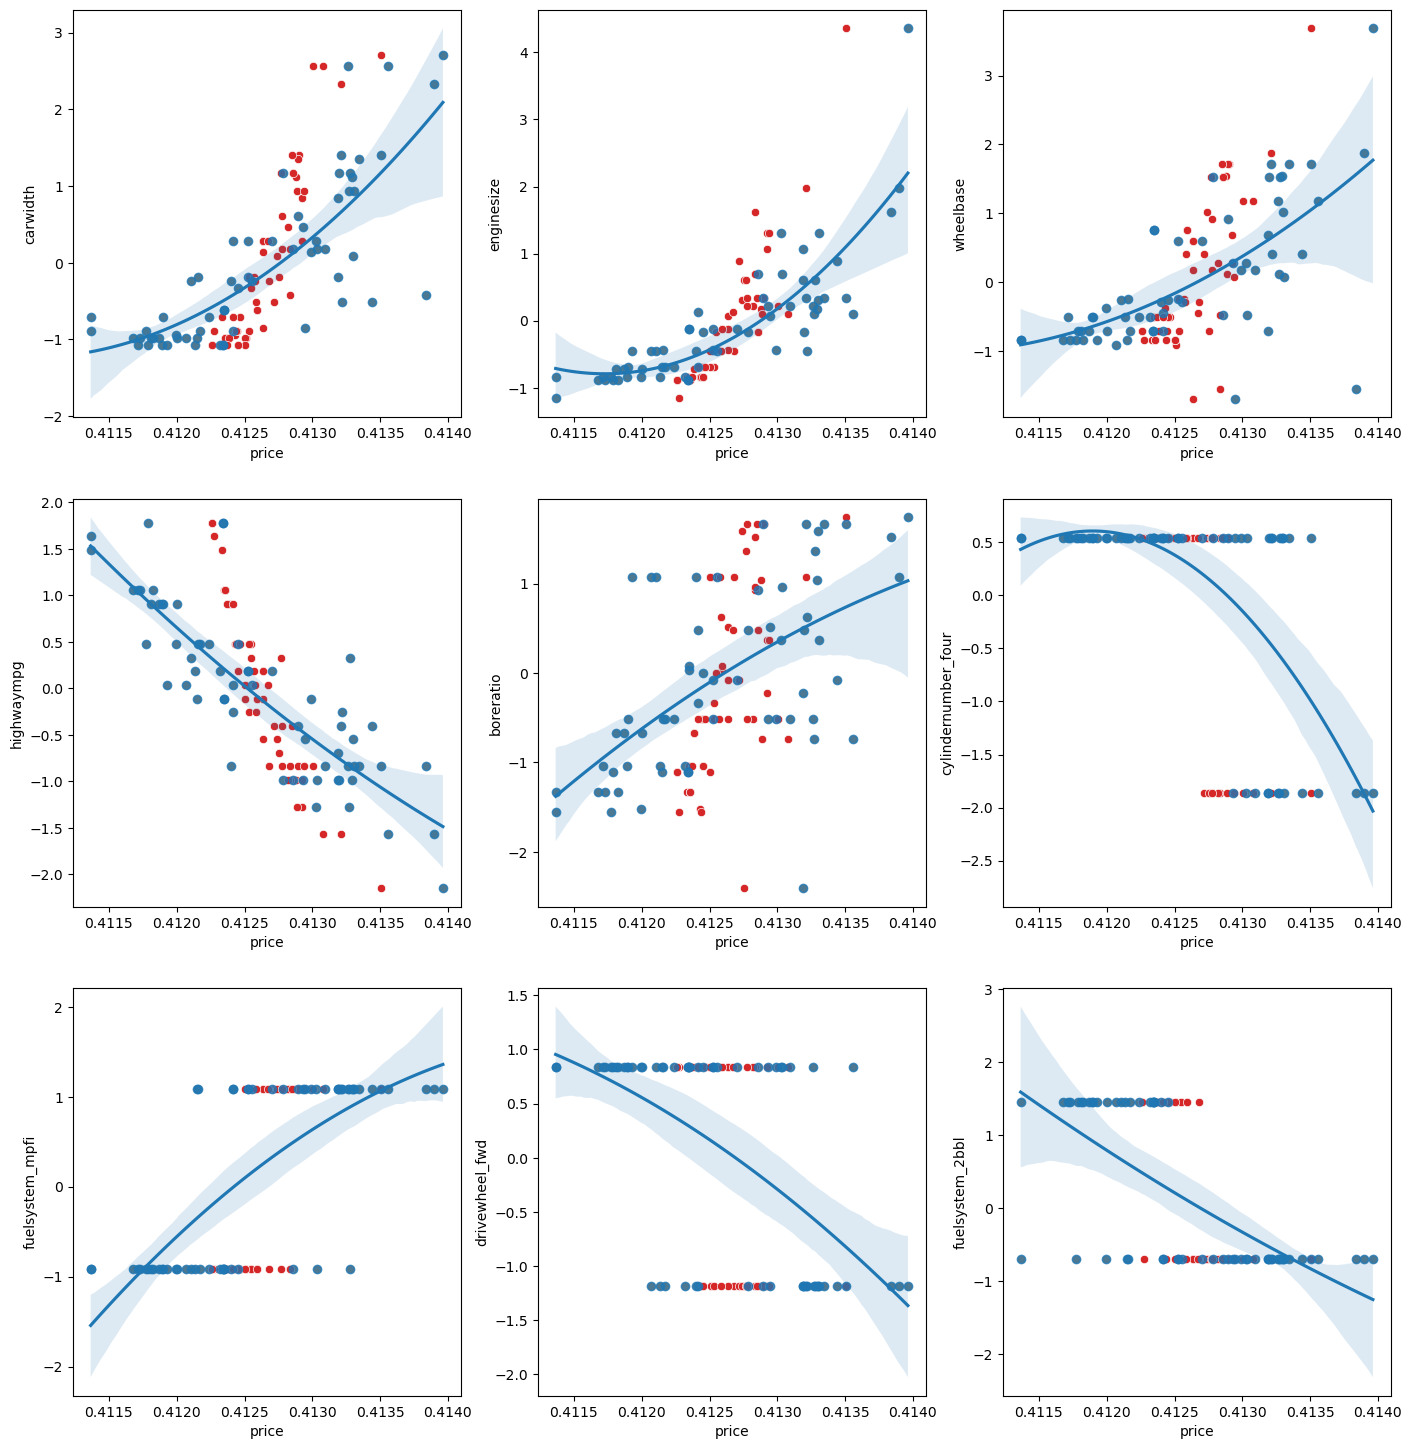

In [25]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,18))
axes = np.ravel(axes)

# test data for price vs all features
for i, j in enumerate(car_test.columns[0:-1]):
  sns.scatterplot(data = car_test, x = 'price', y = j, ax= axes[i], color = 'C1' )
  # predict results vs all features
  sns.scatterplot(x = y_predict, y = car_test.iloc[:,i], ax= axes[i], color = 'C3')
  # polynomial regression with degree = 2
  sns.regplot(data = car_test, x = 'price', y = j, order = 2, ax= axes[i])
plt.show()

In [26]:
lr.score(X_test_2degree, y_test)

-1694175715404.1367

In [27]:
r2_score(y_test, y_predict)

0.5339330695338087

In [28]:
X1_test = X_test.copy()
X1_test['price'] = y_predict
X1_test

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
154,-1.078431,-0.840310,-0.508831,0.181783,-1.035435,0.537874,-0.920243,-1.188177,1.451227,0.412452
144,-0.237296,-0.455148,-0.292420,-0.837195,1.074252,0.537874,-0.920243,-1.188177,1.451227,0.412681
140,-0.984972,-0.455148,-0.908360,0.036215,1.074252,0.537874,-0.920243,-1.188177,1.451227,0.412510
115,1.164596,-0.166277,1.522109,-0.982764,0.482059,0.537874,1.086670,-1.188177,-0.689072,0.412854
36,-0.938242,-0.840310,-0.375655,0.472920,-1.516591,0.537874,-0.920243,0.841625,-0.689072,0.412432
...,...,...,...,...,...,...,...,...,...,...
11,-0.517674,-0.455148,0.406756,-0.254922,0.630108,0.537874,1.086670,-1.188177,-0.689072,0.412587
153,-1.078431,-0.840310,-0.508831,0.909625,-1.035435,0.537874,-0.920243,0.841625,1.451227,0.412368
45,-1.078431,-0.888455,-0.708596,1.783034,-1.109459,0.537874,-0.920243,0.841625,1.451227,0.412263
156,-0.704593,-0.695874,-0.508831,0.909625,-0.517266,0.537874,-0.920243,0.841625,1.451227,0.412415


In [29]:
X1_test

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
154,-1.078431,-0.840310,-0.508831,0.181783,-1.035435,0.537874,-0.920243,-1.188177,1.451227,0.412452
144,-0.237296,-0.455148,-0.292420,-0.837195,1.074252,0.537874,-0.920243,-1.188177,1.451227,0.412681
140,-0.984972,-0.455148,-0.908360,0.036215,1.074252,0.537874,-0.920243,-1.188177,1.451227,0.412510
115,1.164596,-0.166277,1.522109,-0.982764,0.482059,0.537874,1.086670,-1.188177,-0.689072,0.412854
36,-0.938242,-0.840310,-0.375655,0.472920,-1.516591,0.537874,-0.920243,0.841625,-0.689072,0.412432
...,...,...,...,...,...,...,...,...,...,...
11,-0.517674,-0.455148,0.406756,-0.254922,0.630108,0.537874,1.086670,-1.188177,-0.689072,0.412587
153,-1.078431,-0.840310,-0.508831,0.909625,-1.035435,0.537874,-0.920243,0.841625,1.451227,0.412368
45,-1.078431,-0.888455,-0.708596,1.783034,-1.109459,0.537874,-0.920243,0.841625,1.451227,0.412263
156,-0.704593,-0.695874,-0.508831,0.909625,-0.517266,0.537874,-0.920243,0.841625,1.451227,0.412415


In [30]:
X1_test = X1_test.sort_values(by = 'price', ascending = False ).reset_index(drop = True)
X1_test


,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
0,2.706677,4.359372,3.686225,-2.147310,1.740469,-1.859172,1.086670,-1.188177,-0.689072,0.413510
1,2.332839,1.976184,1.871697,-1.565037,1.074252,-1.859172,1.086670,-1.188177,-0.689072,0.413209
2,2.566488,0.098522,1.172521,-1.565037,-0.739338,-1.859172,1.086670,0.841625,-0.689072,0.413075
3,2.566488,0.218885,1.172521,-0.837195,-0.517266,-1.859172,1.086670,0.841625,-0.689072,0.413001
4,0.930947,1.302152,0.073815,-0.837195,0.371023,-1.859172,1.086670,-1.188177,-0.689072,0.412937
...,...,...,...,...,...,...,...,...,...,...
57,-0.704593,-0.840310,-0.841772,1.491898,-1.331531,0.537874,-0.920243,0.841625,1.451227,0.412336
58,-0.891512,-1.153254,-0.841772,1.637466,-1.553603,0.537874,-0.920243,0.841625,-0.689072,0.412275
59,-1.078431,-0.888455,-0.708596,1.783034,-1.109459,0.537874,-0.920243,0.841625,1.451227,0.412263
60,-1.078431,-0.888455,-0.708596,1.783034,-1.109459,0.537874,-0.920243,0.841625,1.451227,0.412263


In [31]:
# rearrange the test and predict data 

y_pred = X1_test['price']
cond = X1_test.columns == 'price'
r = X1_test.columns[~cond]
temp = X1_test[r]

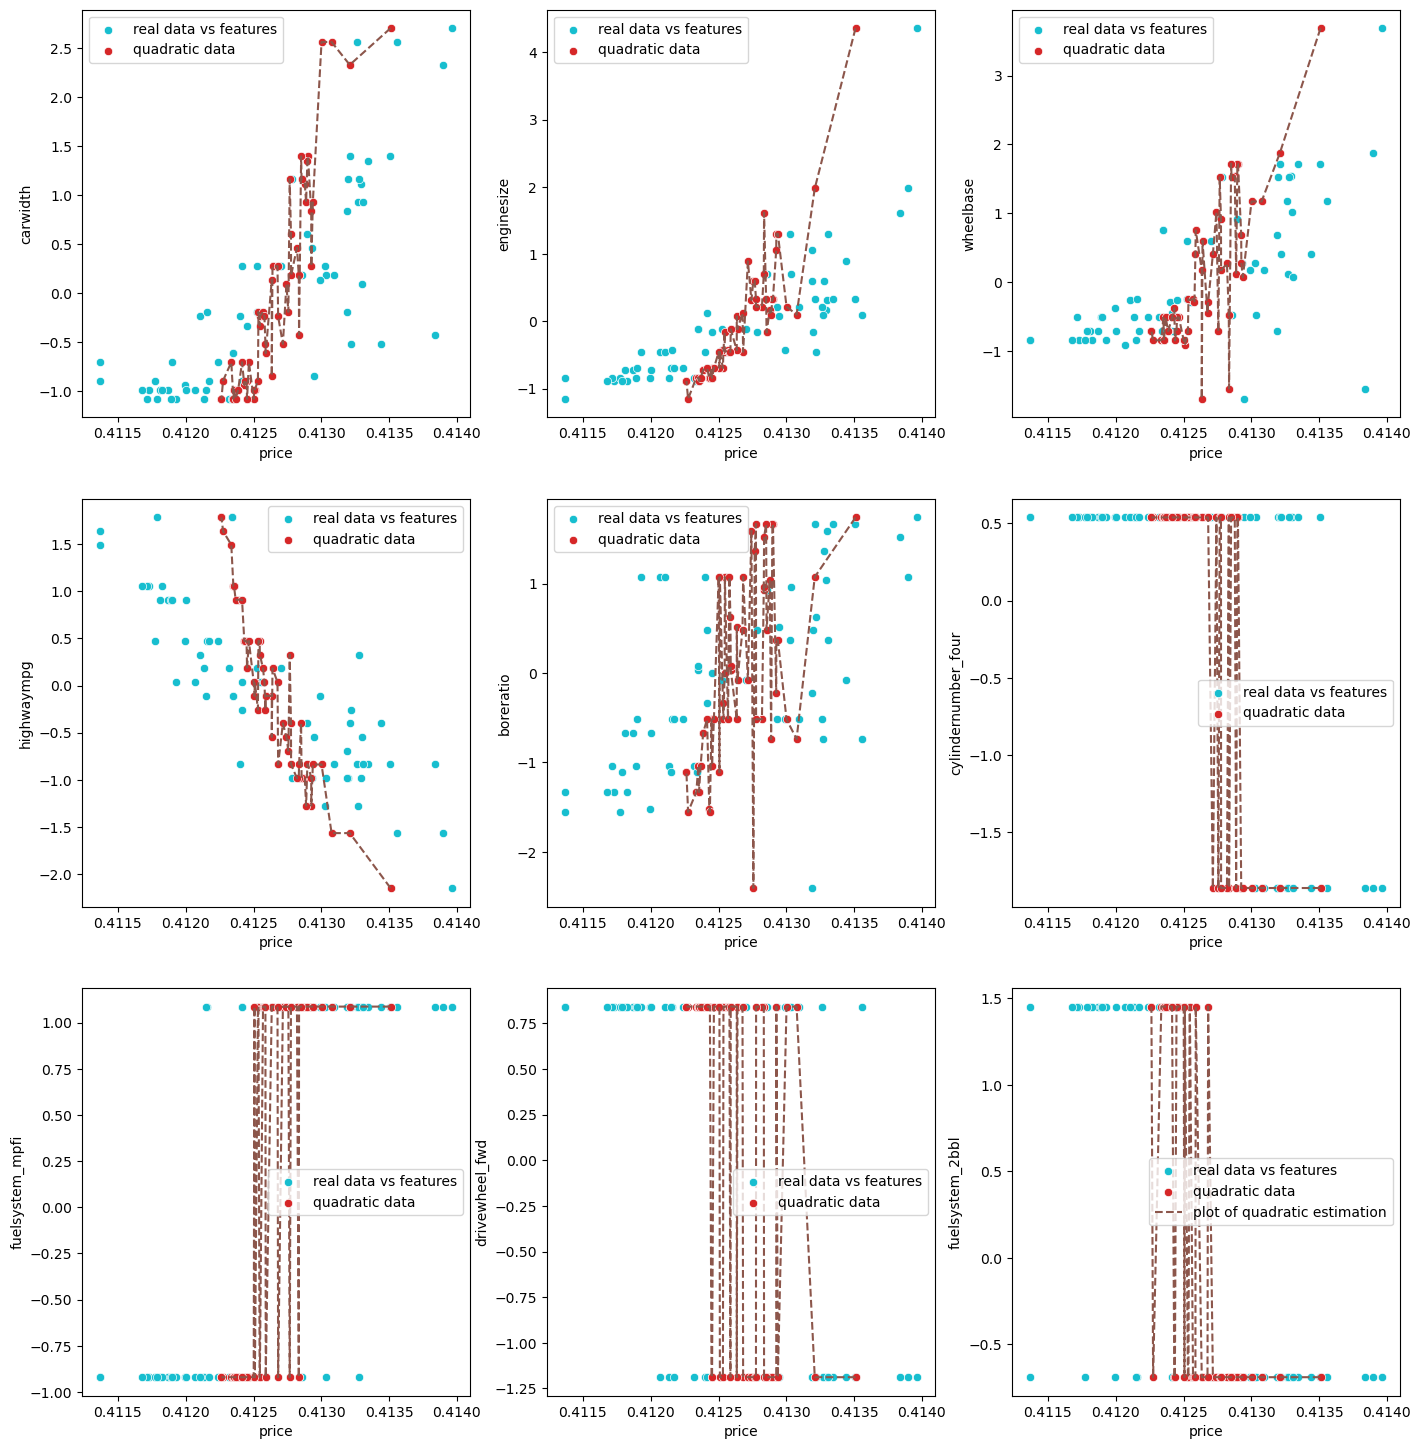

In [32]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,18))
axes = np.ravel(axes)

for i, j in enumerate(car_test.columns[0:-1]):


  sns.scatterplot(data = car_test, x = 'price', y = j, color = 'C9' ,ax = axes[i], label = 'real data vs features')
  sns.scatterplot(x = y_predict, y = car_test.iloc[:, i] , color = 'C3', ax= axes[i], label = 'quadratic data')
  axes[i].plot(y_pred, temp.iloc[:, i], color = 'C5', marker = '',linestyle = '--',  label = 'plot of quadratic estimation')

plt.legend()
  
  
plt.show()